## Section one gathers data for all fossil occurrences for the specified interval

In [1]:
%matplotlib inline
import json#,codecs

In [2]:
time_interval = 'devonian'
occ_taxon = 'foraminifera'
occ_baseurl = 'https://paleobiodb.org/data1.2/occs/list.json?'
occ_baseopts = 'show=loc,class'
print time_interval + ', ' + occ_taxon

devonian, foraminifera


### In this next section, we can gather all the taxa for the specified time period, and plot the counts.

In [3]:
url = occ_baseurl + 'interval=' + time_interval + '&' + occ_baseopts
#url = 'https://paleobiodb.org/data1.2/occs/list.json?interval=' + time_interval + '&show=loc,class'
#url = url + '&name=' + occ_taxon
print url
data = (r.get(url)).json()['records']
#data[0]

https://paleobiodb.org/data1.2/occs/list.json?interval=devonian&show=loc,class


In [4]:
# Generate a list of taxa
phl_list = []
for x in data:
    if x.has_key('phl'):
        phl_list.append(str(x['phl']))
# Create a list of unique taxa and the number of occurrences        
phl_counts = Counter(phl_list)

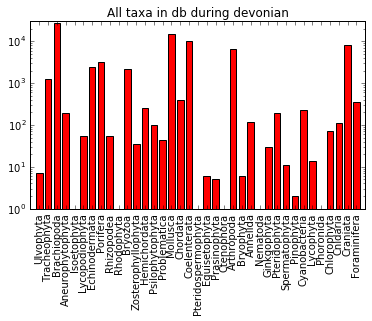

In [5]:
N = len(phl_counts)
phl_data = tuple(phl_counts.values())
ind = np.arange(N)
width = .75
fig,ax = plt.subplots()
rects = ax.bar(ind,phl_data,width,color='r',tick_label=phl_counts.keys(),align='center')
plt.xlim([-1,ind.size])
ax.set_yscale('log')
ax.set_title('All taxa in db during ' + time_interval)
plt.xticks(rotation='vertical')
plt.margins(0.1)
plt.subplots_adjust(bottom=0.25)

## Here we can gather information about the gelogic time intervals

In [6]:
time_url = 'https://paleobiodb.org/data1.2/intervals/list.json?scale=1'
interval_list = (r.get(time_url)).json()['records']

In [7]:
interval_names = []
for x in interval_list:
    if x['lvl'] == 3:
        #print x['nam']
        interval_names.append(str(x['nam']))

## In this section we can gather data about a single taxon across all time

In [13]:
try:
    del(results)
except NameError:
    results = {}
for x in interval_names:
    print 'Gathering taxon data for ' + occ_taxon + ' during ' + x
    time_interval = x
    url = occ_baseurl + 'interval=' + x + '&' + occ_baseopts + '&base_name=' + occ_taxon
    results[x] = (r.get(url)).json()

Gathering taxon data for foraminifera during Quaternary
Gathering taxon data for foraminifera during Neogene
Gathering taxon data for foraminifera during Paleogene
Gathering taxon data for foraminifera during Cretaceous
Gathering taxon data for foraminifera during Jurassic
Gathering taxon data for foraminifera during Triassic
Gathering taxon data for foraminifera during Permian
Gathering taxon data for foraminifera during Carboniferous
Gathering taxon data for foraminifera during Devonian
Gathering taxon data for foraminifera during Silurian
Gathering taxon data for foraminifera during Ordovician
Gathering taxon data for foraminifera during Cambrian
Gathering taxon data for foraminifera during Ediacaran
Gathering taxon data for foraminifera during Cryogenian
Gathering taxon data for foraminifera during Tonian
Gathering taxon data for foraminifera during Stenian
Gathering taxon data for foraminifera during Ectasian
Gathering taxon data for foraminifera during Calymmian
Gathering taxon d

In [25]:
# Process the results so that we have summaries for each time period
# First, get a count of list of all species names per interval
interval_totes = {}
len(results['Cretaceous'].values()[0])
for x in interval_names:
    interval_totes[x] = len(results[x].values()[0])
interval_totes

{'Calymmian': 0,
 'Cambrian': 18,
 'Carboniferous': 4542,
 'Cretaceous': 12210,
 'Cryogenian': 0,
 'Devonian': 360,
 'Ectasian': 0,
 'Ediacaran': 5,
 'Jurassic': 4333,
 'Neogene': 6600,
 'Ordovician': 9,
 'Orosirian': 0,
 'Paleogene': 4783,
 'Permian': 9327,
 'Quaternary': 838,
 'Rhyacian': 0,
 'Siderian': 0,
 'Silurian': 10,
 'Statherian': 0,
 'Stenian': 0,
 'Tonian': 0,
 'Triassic': 1972}

In [ ]:
# Save the data to a file for offline analysis
#with open('foramin_alltime.json','w') as f:
#    json.dump(results.values(), f, sort_keys=True, indent=4)

['__author__',
 '__builtins__',
 '__copyright__',
 '__doc__',
 '__email__',
 '__file__',
 '__license__',
 '__maintainer__',
 '__name__',
 '__package__',
 '__status__',
 '__version__',
 'dictionary',
 'generatePhylogeny',
 'generateTaxaDict',
 'json',
 'occ_opt',
 'occ_tax',
 'occ_url',
 'pbHelp',
 'phylo_opt',
 'phylo_tax',
 'phylo_url',
 'pp',
 'printDict',
 'printPhylogeny',
 'r']